CROP RECOMMENDATION USING WEATHER AND SOIL CONTENT

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MobiOs/Crop_recommendation.csv')
df.head()

Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall label  Unnamed: 8  Unnamed: 9  
0  202.935536  rice         NaN         NaN  
1  226.655537  rice         NaN         NaN  
2  263.964248  rice         NaN         NaN  
3  242.864034  rice         NaN         NaN  
4  262.717340  rice         NaN         NaN

In [ ]:
df.describe()

Nitrogen   phosphorus    potassium  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  Unnamed: 8  Unnamed: 9  
count  2200.000000  2200.000000         0.0         0.0  
mean      6.469480   103.463655         NaN         NaN  
std       0.773938    54.958389         NaN         NaN  
min       3.504752    20.211267         NaN         NaN  
25%       5.971693    64.551686         NaN         NaN  
50%       6.425045    94.867624         NaN         NaN  
75%       6.923643   124.267508         NaN         NaN  
max       9.935091   298.560117         NaN         NaN

In [ ]:
df.drop('Unnamed: 8', axis=1, inplace=True)


In [ ]:
df.drop('Unnamed: 9', axis=1, inplace=True)

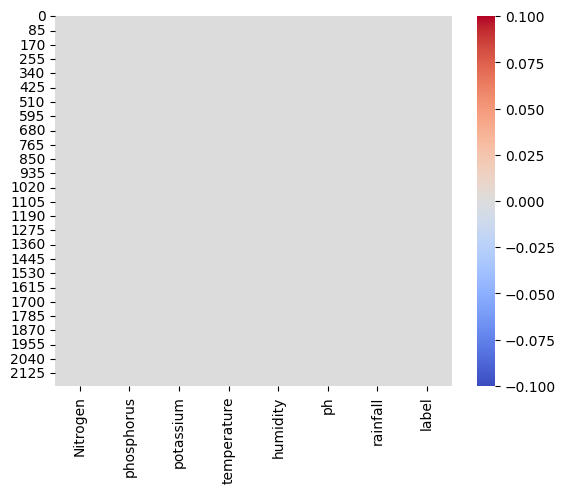

In [ ]:
#Heatmap to check null/missing values
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

<Axes: xlabel='ph', ylabel='Density'>

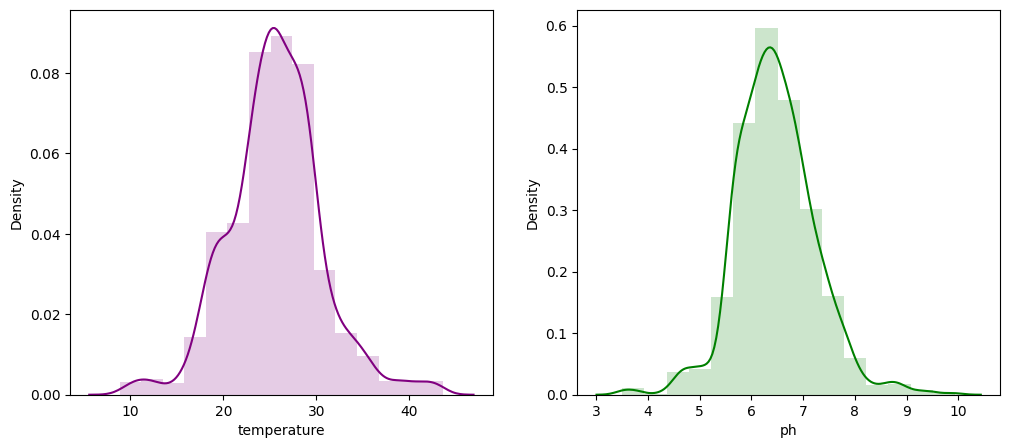

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

In [ ]:
#sns.countplot(y='label',data=df, palette="plasma_r"

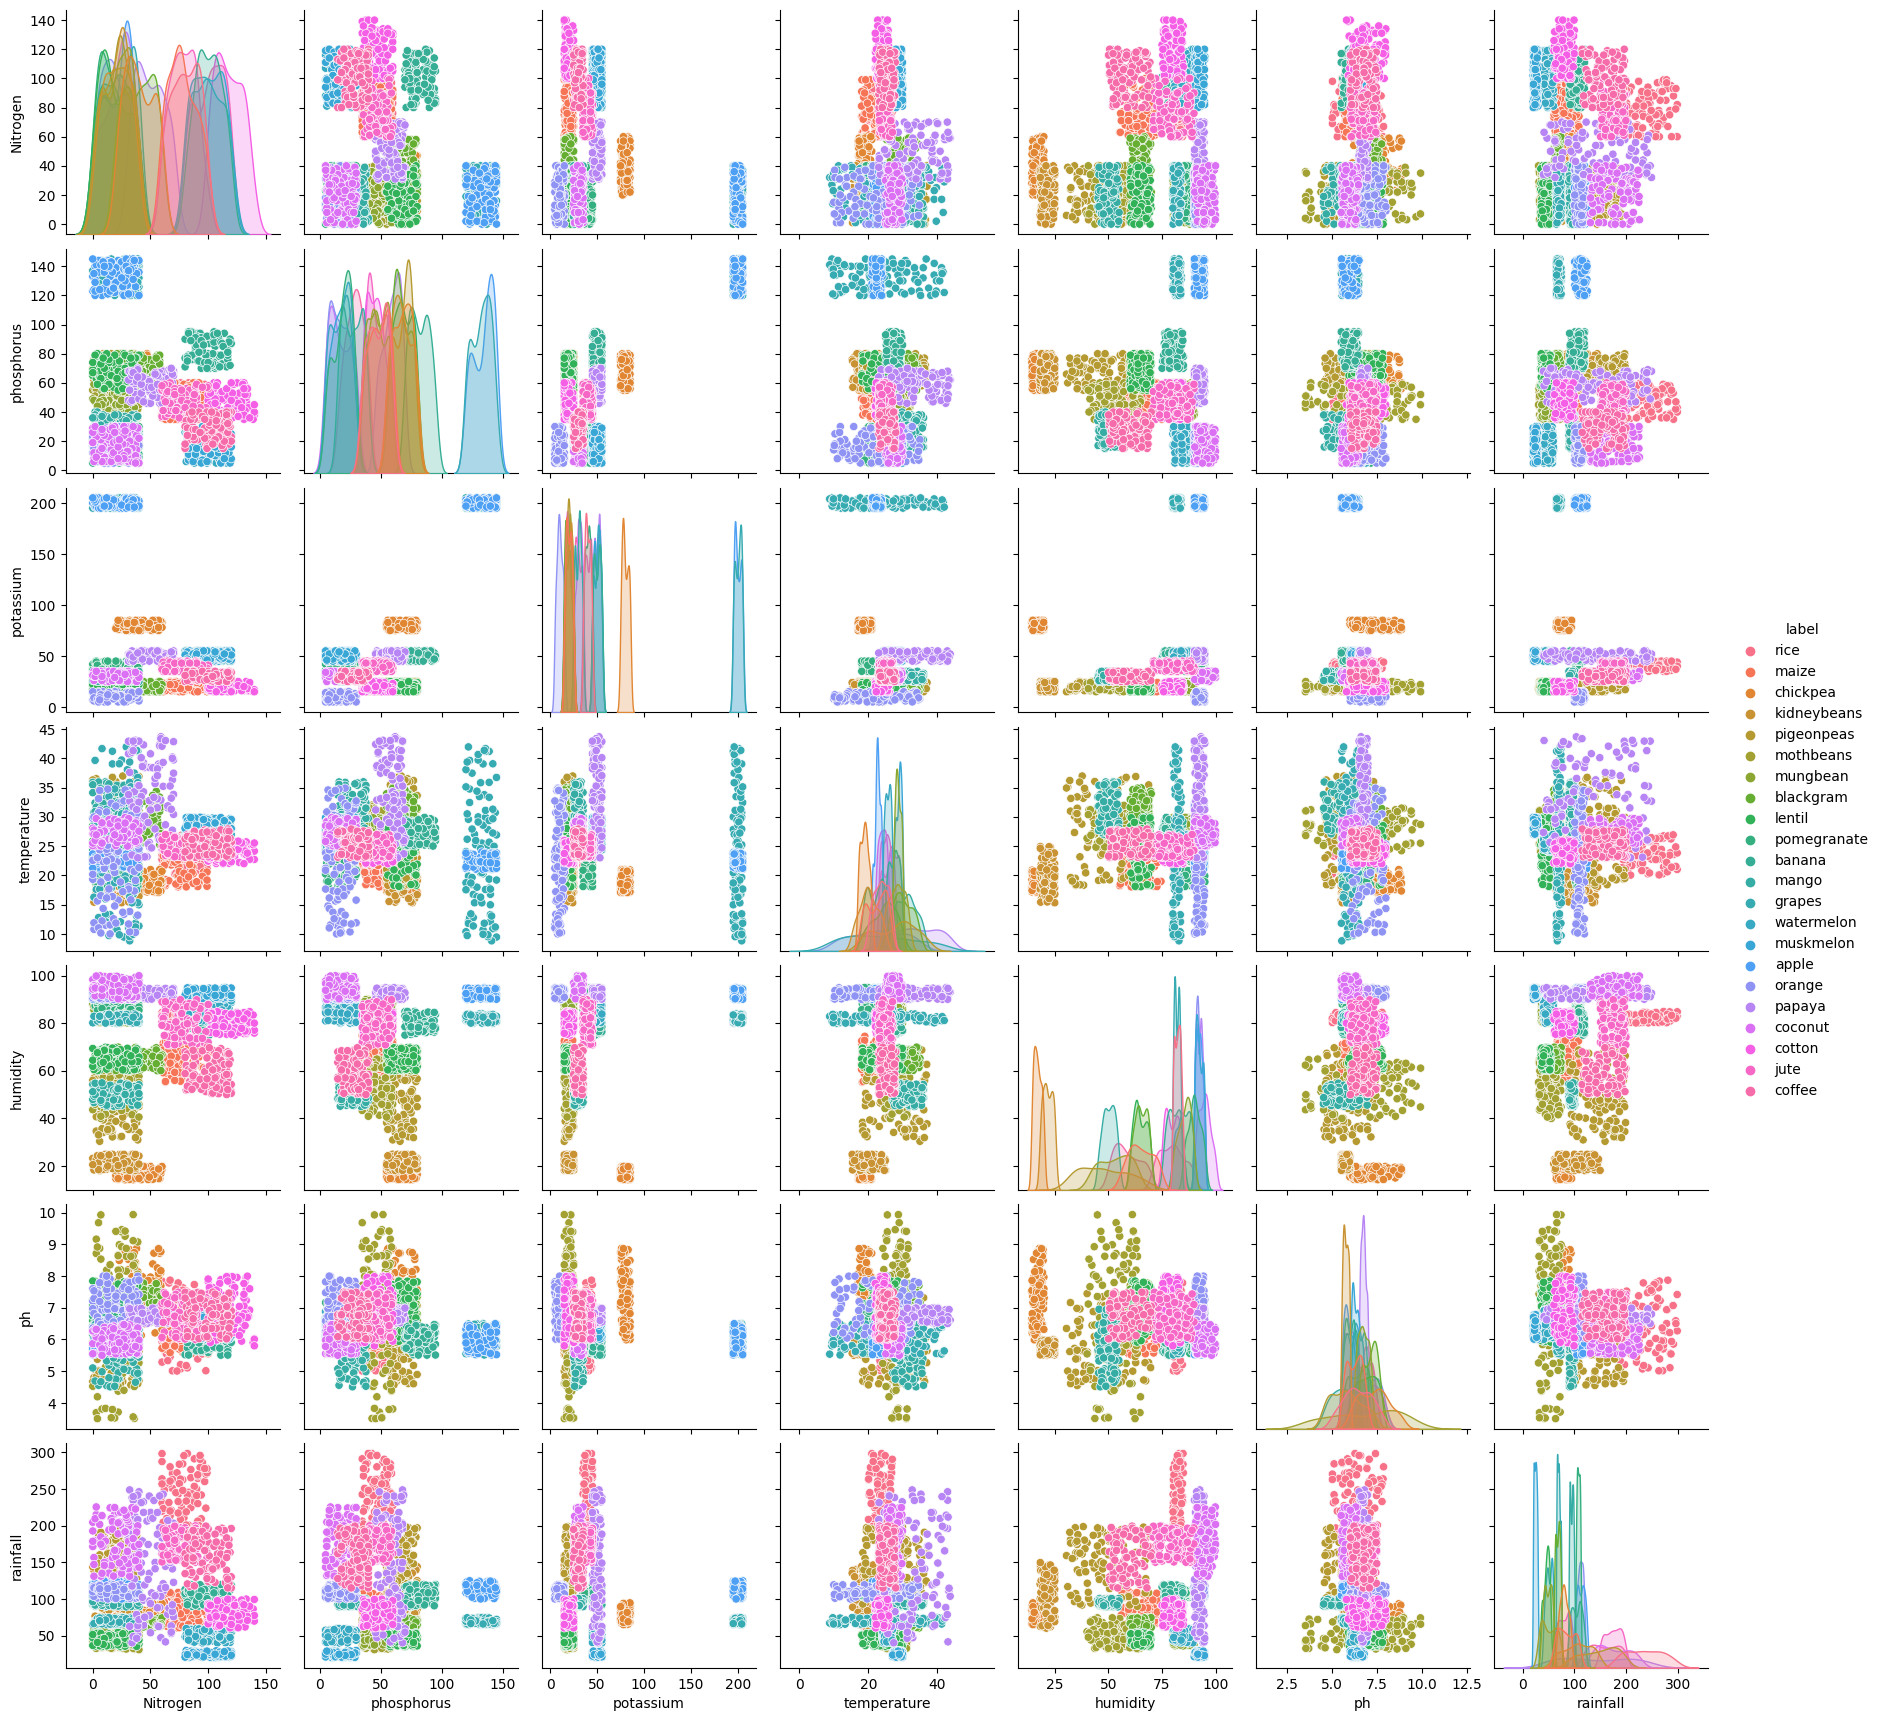

In [ ]:
sns.pairplot(df, hue = 'label')

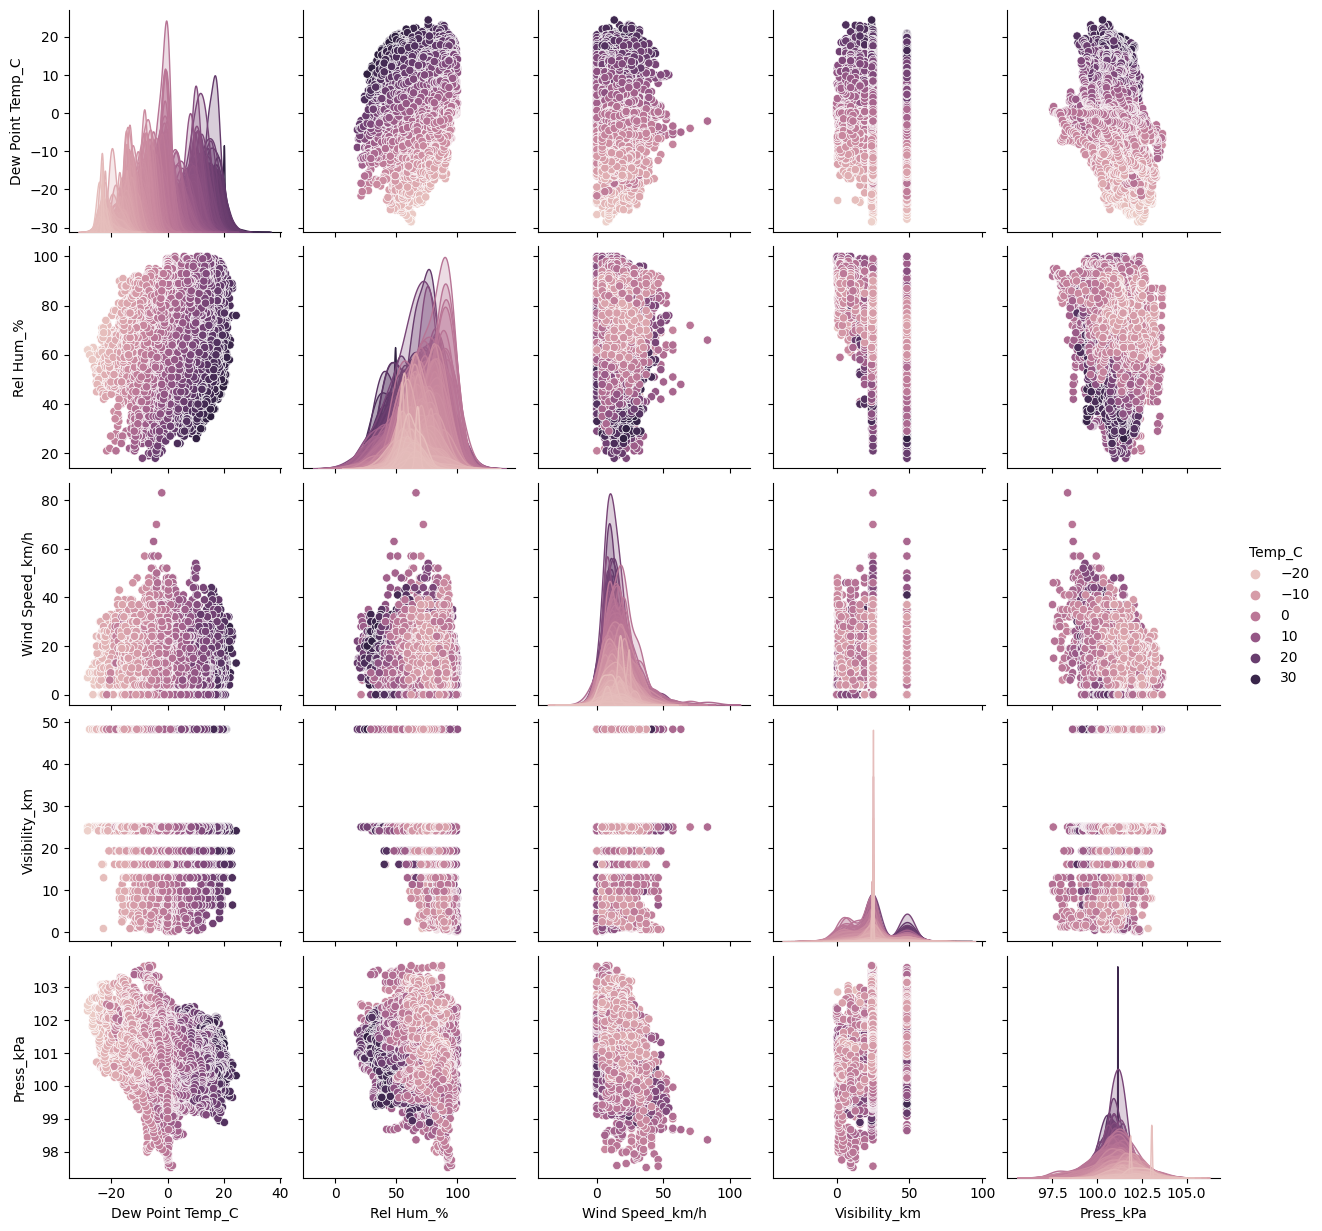

In [ ]:
sns.pairplot(df_1, hue = 'Temp_C')

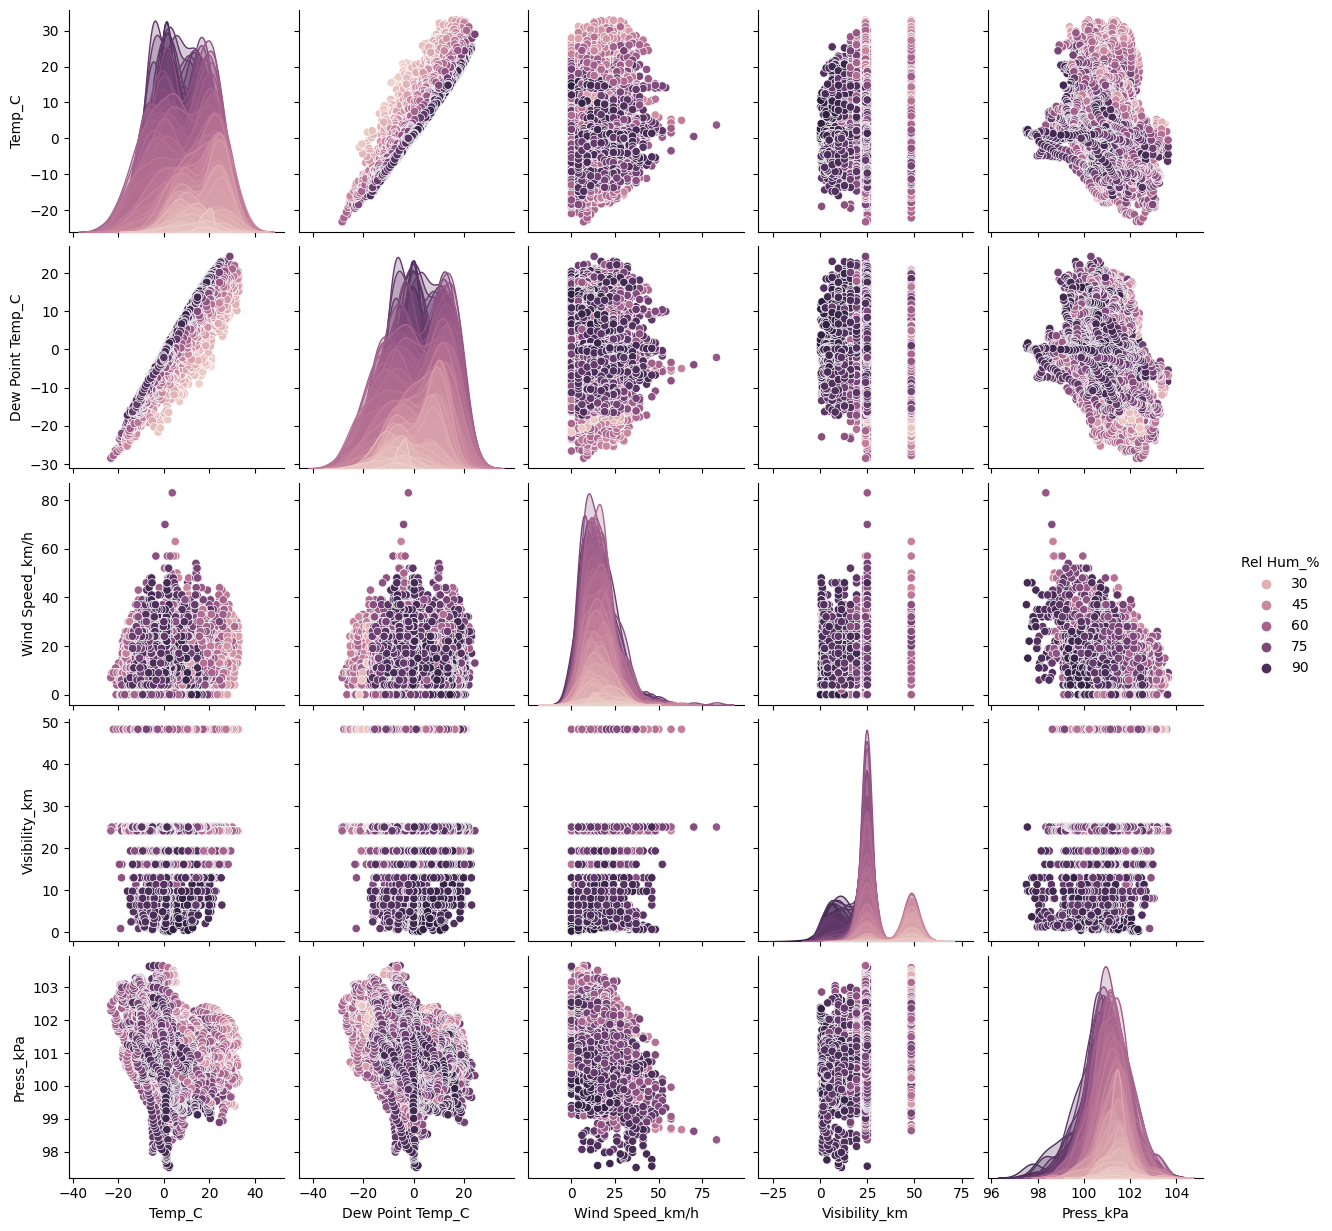

In [ ]:
sns.pairplot(df_1, hue = 'Rel Hum_%')

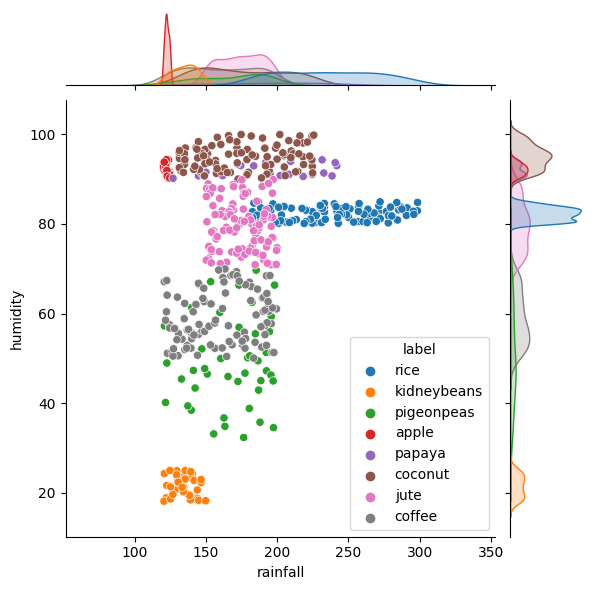

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

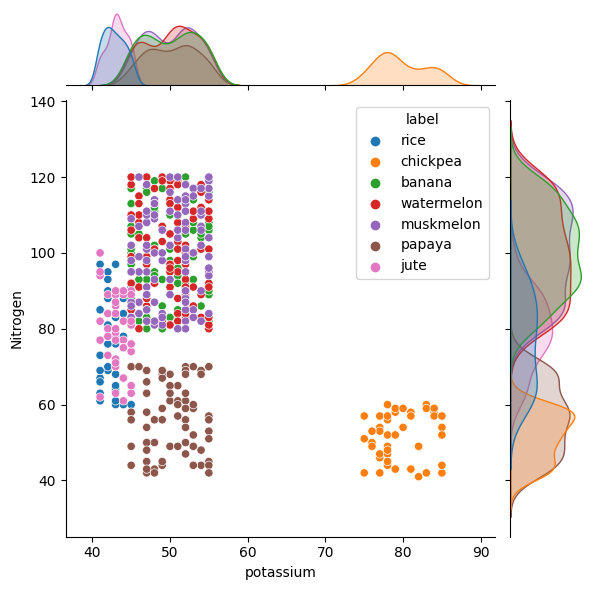

In [ ]:
sns.jointplot(x="potassium",y="Nitrogen",data=df[(df['Nitrogen']>40)&(df['potassium']>40)],hue="label")

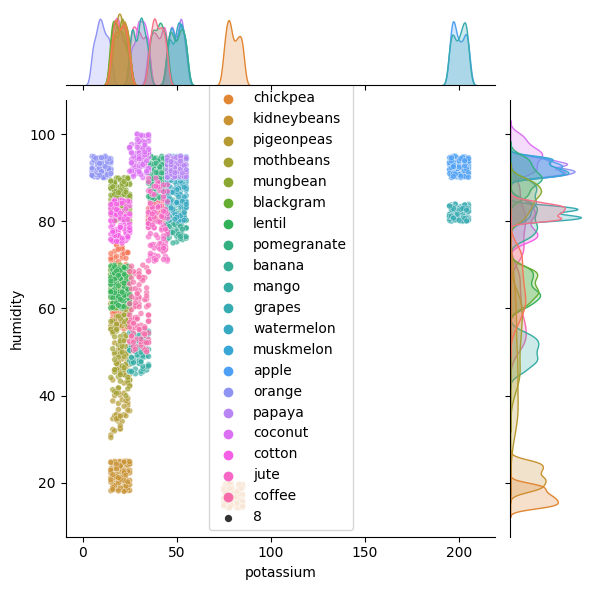

In [ ]:
sns.jointplot(x="potassium",y="humidity",data=df,hue='label',size=8,s=30,alpha=0.7)

<Axes: xlabel='ph', ylabel='label'>

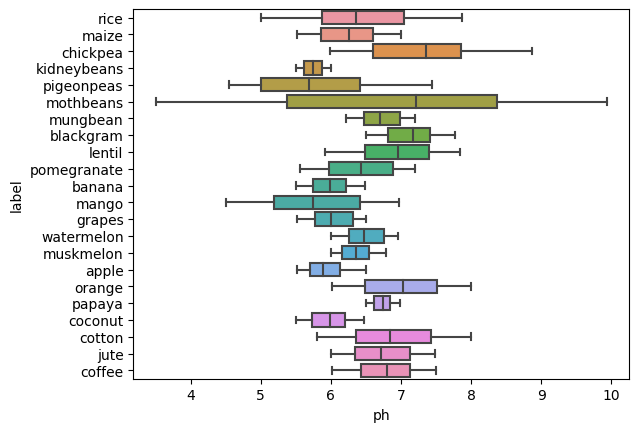

In [ ]:
sns.boxplot(y='label',x='ph',data=df)

<Axes: xlabel='phosphorus', ylabel='label'>

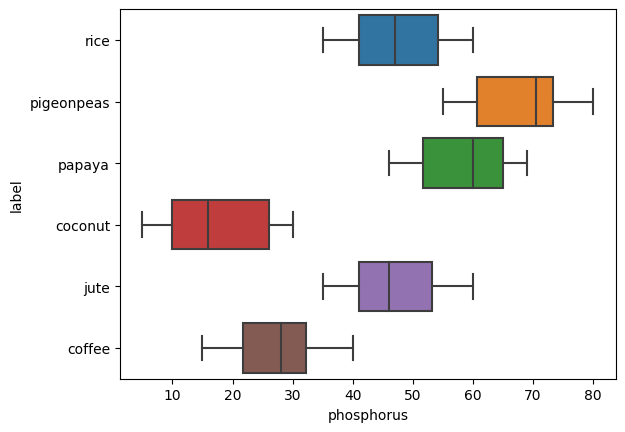

In [ ]:
sns.boxplot(y='label',x='phosphorus',data=df[df['rainfall']>150])

<Axes: xlabel='potassium', ylabel='rainfall'>

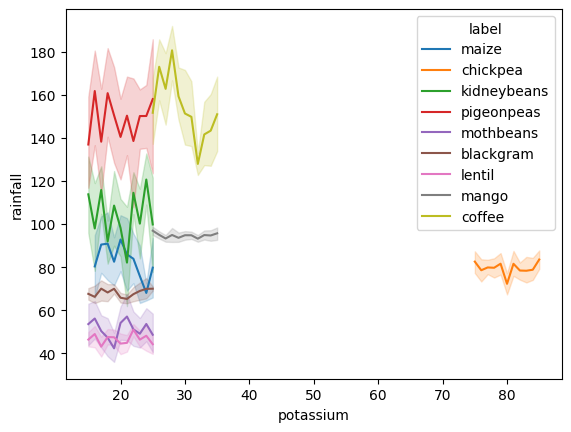

In [ ]:
sns.lineplot(data = df[(df['humidity']<65)], x = "potassium", y = "rainfall",hue="label")

# DATA PRE-**PROCESSING**

In [ ]:
df.isna().sum()

Nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df_1.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [ ]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['Nitrogen','phosphorus','potassium','temperature','humidity','ph','rainfall']]

<Axes: >

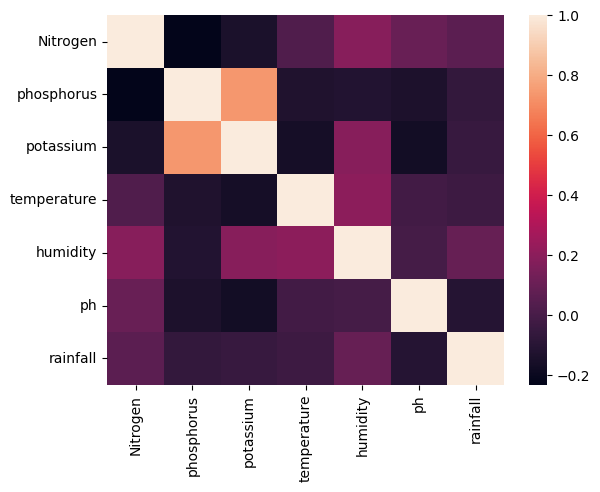

In [ ]:
sns.heatmap(X.corr())

FEATURE SCALING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

MODEL SELECTION
KNN Classifier for Crop prediction

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9781818181818182

Confusion Matrix

<Axes: >

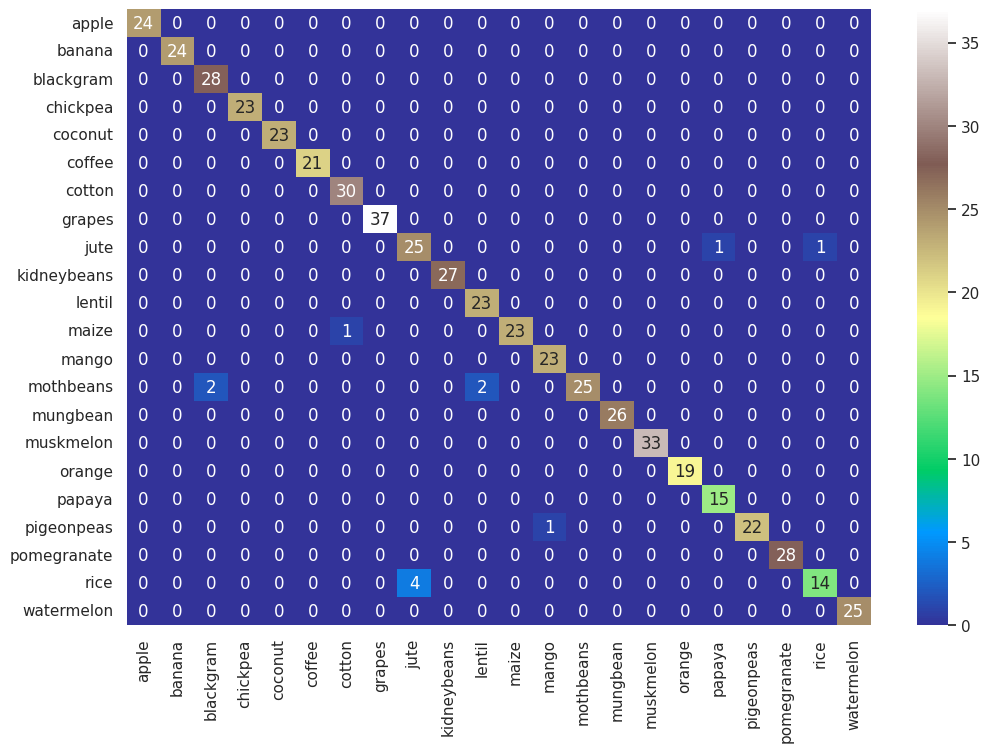

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

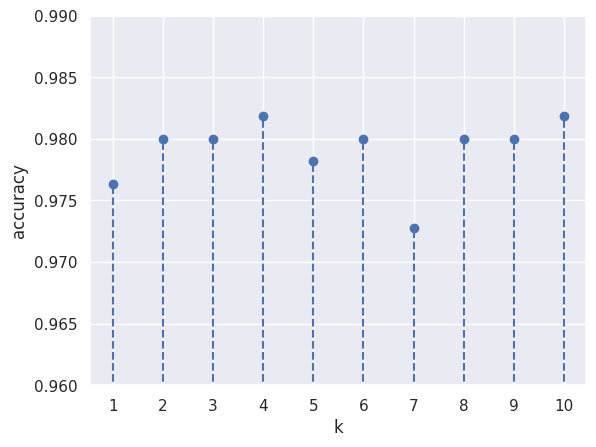

In [ ]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)]);

Classification using Support Vector Classifer (SVC)

In [ ]:
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

Linear Kernel Accuracy:  0.9745454545454545
Rbf Kernel Accuracy:  0.9872727272727273
Poly Kernel Accuracy:  0.9890909090909091


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}
# 'degree': np.arange(0,5,1).tolist(), 'kernel':['linear','rbf','poly']

model = GridSearchCV(estimator = SVC(kernel="linear"), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

In [ ]:
print(model.best_score_ )
print(model.best_params_ )

0.9866710547967747
{'C': 1.0, 'gamma': 0.001}


Classifying using decision tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.9872727272727273

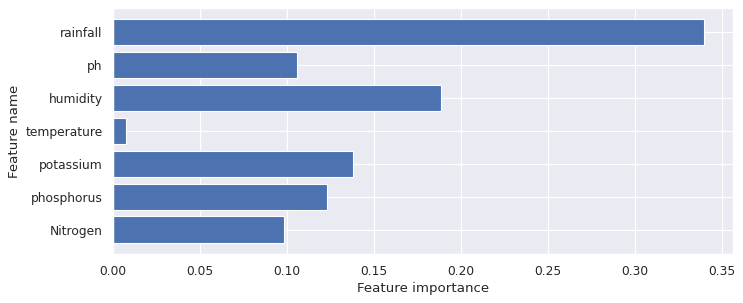

In [ ]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

RF Accuracy on training set: 0.97
RF Accuracy on test set: 0.97


Classification report

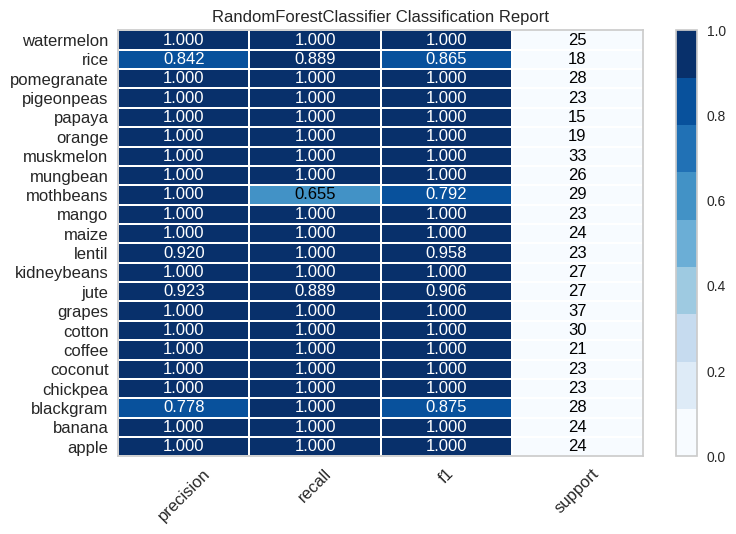

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport
classes=list(targets.values())
visualizer = ClassificationReport(clf, classes=classes, support=True,cmap="Blues")

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier().fit(X_train, y_train)
print('Gradient Boosting accuracy : {}'.format(grad.score(X_test,y_test)))

Gradient Boosting accuracy : 0.9927272727272727
